For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data. You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.


Import the necessary libraries if you are starting a new notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

#### Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df.head(5)
customer_df.rename(columns=lambda col: col.replace(' ', '_').lower(), inplace=True)
customer_df.effective_to_date = pd.to_datetime(customer_df.effective_to_date)

In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

#### What should we do with the customer_id column?


We should remove it because it contains no valuable information.

In [4]:
customer_df_cat  = customer_df.drop("customer", axis=1, inplace = True)
customer_df_cat 

#### Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
numerical_df = customer_df.select_dtypes()
categorical_df = customer_df.select_dtypes()

In [5]:
customer_df_cat = customer_df.select_dtypes(include=object)
customer_df_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [6]:
customer_df_num = customer_df.select_dtypes(include=np.number)
customer_df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


#### Plot every categorical variable. 
What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

In [7]:
customer_df_cat.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [8]:
customer_df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

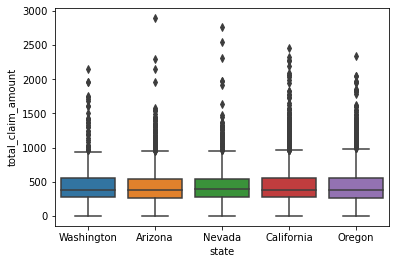

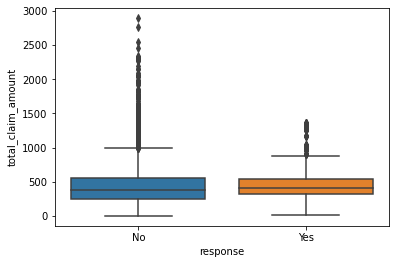

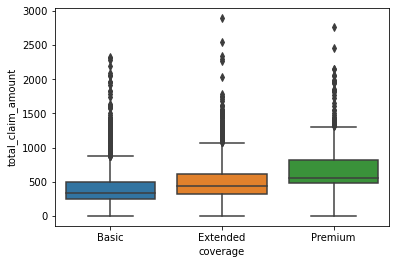

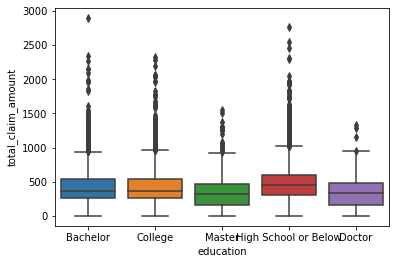

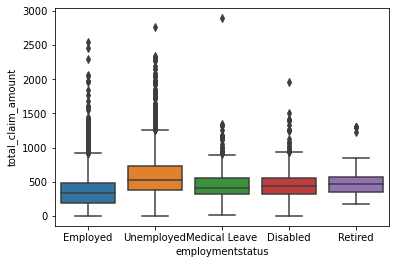

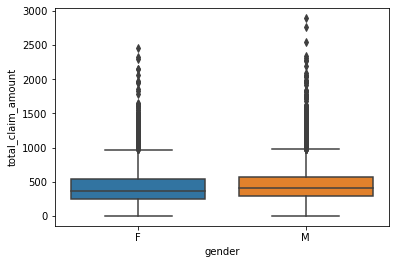

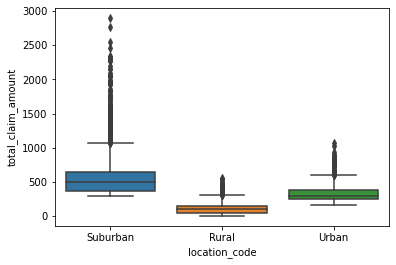

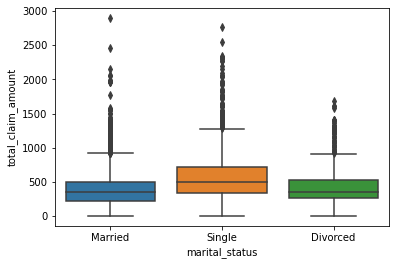

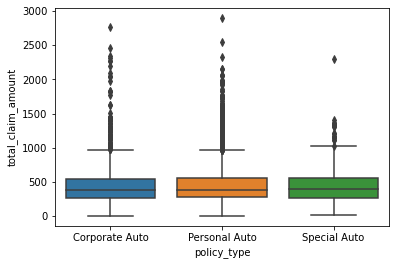

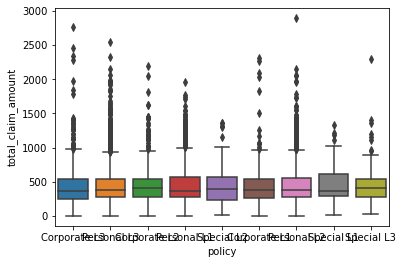

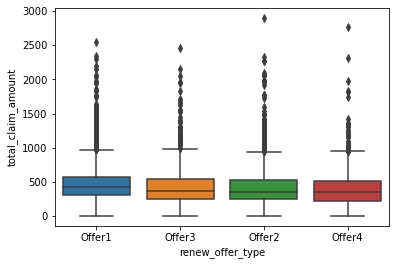

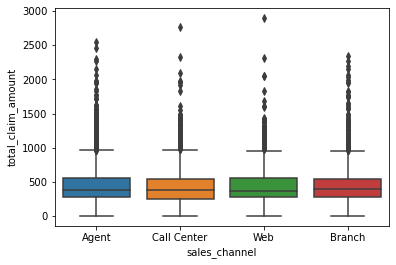

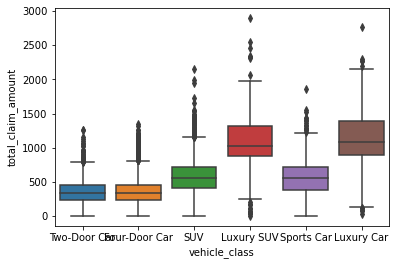

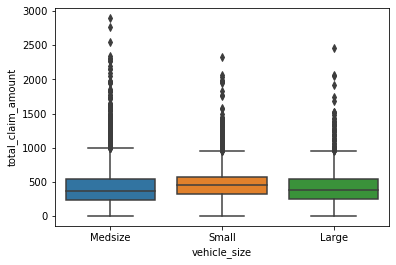

In [9]:
for cat in customer_df_cat:
    sns.boxplot(x = customer_df_cat[cat], y = customer_df_num["total_claim_amount"])
    plt.show()

#### For the categorical data, check if there is any data cleaning that need to perform. 
Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [10]:
for cat in customer_df_cat:
    print(customer_df_cat[cat].value_counts())
    print("")
    print('\033[1m' + cat + '\033[0m')

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

state
No     7826
Yes    1308
Name: response, dtype: int64

response
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

coverage
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

education
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

employmentstatus
F    4658
M    4476
Name: gender, dtype: int64

gender
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

location_code
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

marital_status
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

policy_ty

In [11]:
customer_df_cat.state.value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

Data seems highly inbalanced and needs to be balanced if classification is chosen. This can be done using SMOTE, Tomeklink. 

#### NEW LAB: For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

In [12]:
customer_df_cat.head(5)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


#### Plot all the categorical variables with the proper plot. What can you see?

In [13]:
customer_df_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


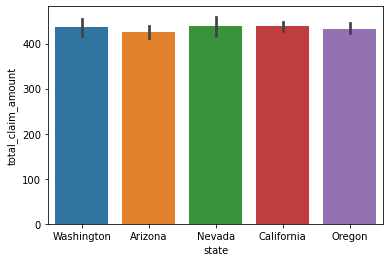

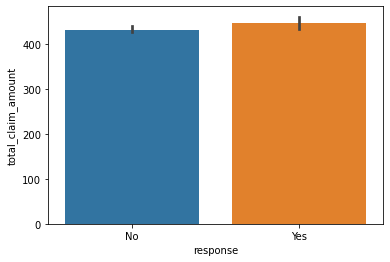

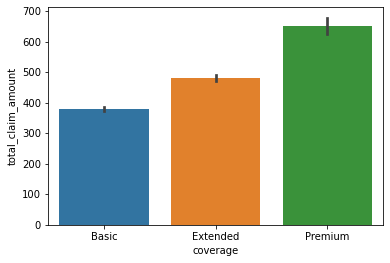

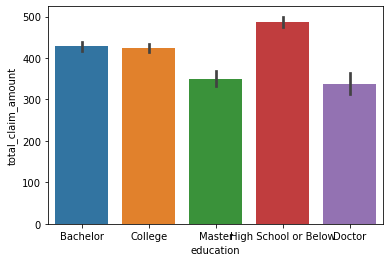

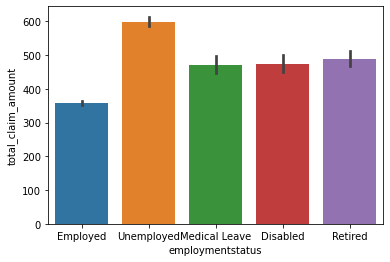

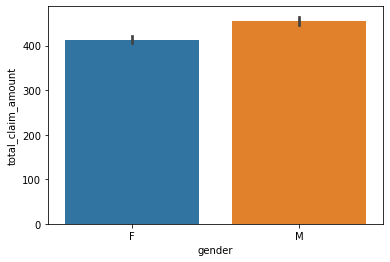

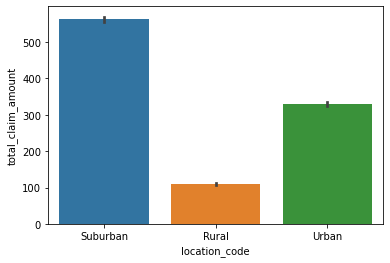

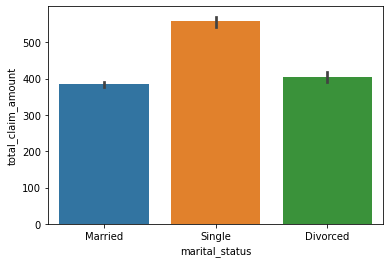

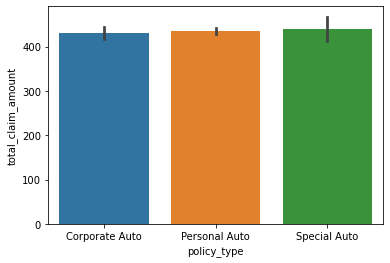

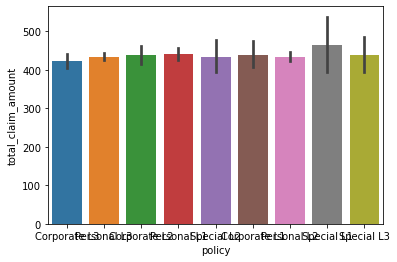

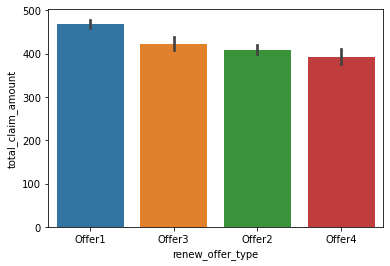

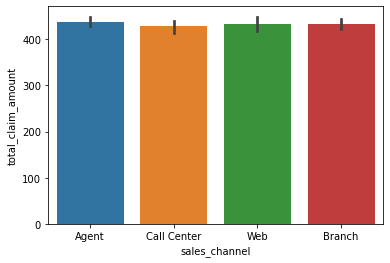

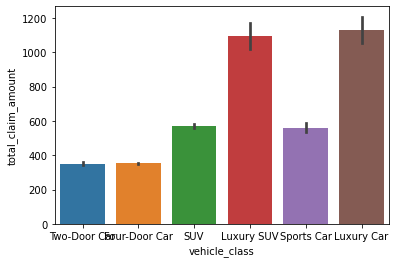

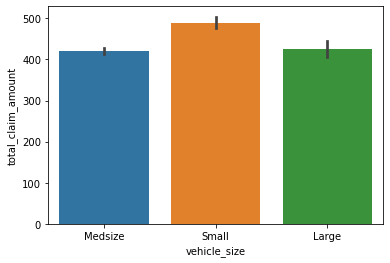

In [14]:
for cat in customer_df_cat:
    sns.barplot(x = customer_df_cat[cat], y = customer_df_num["total_claim_amount"])
    plt.show()

Couple of observations from plotting catgerical features against or target variable:
- Unemployed resulting in higher tca (total claim amount)
- Suburban have the highest amount of tca, potentially because they drive more?
- Luxury vehicles higher tca, makes sense, higher car price -> higher tca


#### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?


In [15]:
for cat in customer_df_cat:
    print('\033[1m' + cat + '\033[0m')
    print("")
    print(customer_df_cat[cat].value_counts())
    print("")
    

state

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

response

No     7826
Yes    1308
Name: response, dtype: int64

coverage

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

education

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

employmentstatus

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

gender

F    4658
M    4476
Name: gender, dtype: int64

location_code

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

marital_status

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

policy_type

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dt

In [16]:
customer_df_cat.state.value_counts().sum()

9134

In [17]:
customer_df_cat.response.value_counts().sum()

9134

Frankly, the only columns i would remove is the response col, all other cols have potential relevant information. 

#### Plot time variable. Can you extract something from it?

In [18]:
customer_df.effective_to_date.sort_values()

3451   2011-01-01
4044   2011-01-01
3993   2011-01-01
7846   2011-01-01
7847   2011-01-01
          ...    
461    2011-02-28
5756   2011-02-28
8679   2011-02-28
4191   2011-02-28
1476   2011-02-28
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

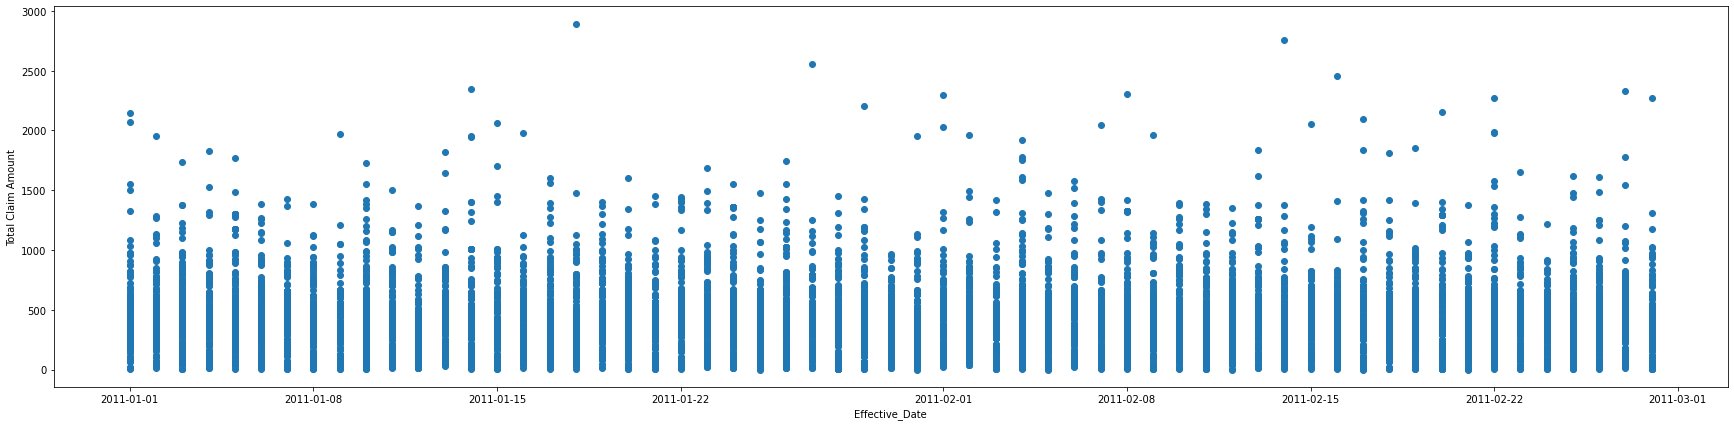

In [19]:
x = customer_df["effective_to_date"]
y = customer_df["total_claim_amount"]

fig = plt.figure(figsize=(30, 7))

plt.xlabel("Effective_Date")
plt.ylabel("Total Claim Amount")

plt.scatter(x,y)
plt.show()

No tendency to observe. We would need more data (longer timeframe) to see any significant relations between time and claim amount. 

### Lab | Data cleaning and wrangling

We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.


In [20]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premium_a

In [21]:
#customer_df_num = customer_df.select_dtypes(include=np.number)
#customer_df_cat = customer_df.select_dtypes(include=np.object)

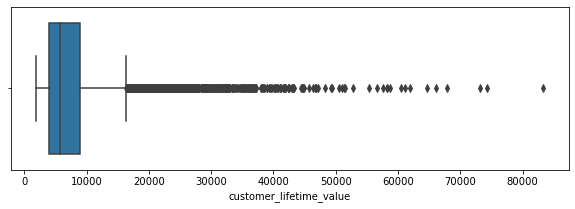

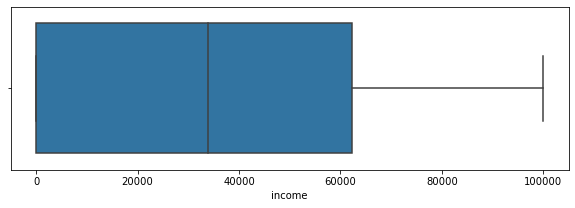

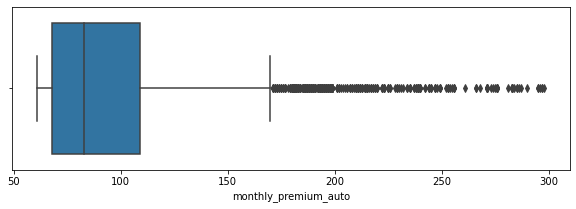

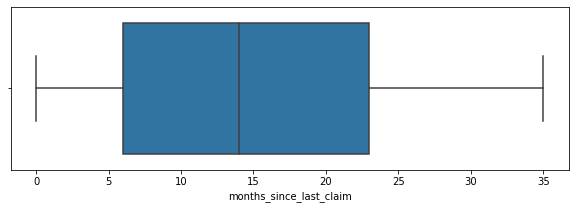

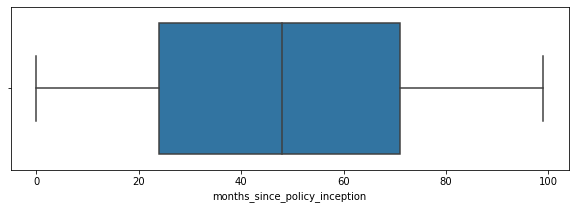

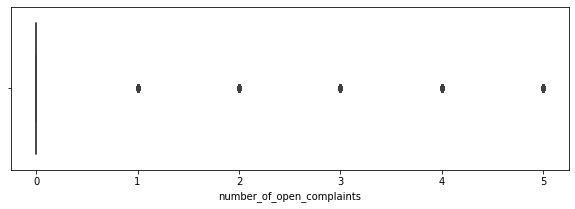

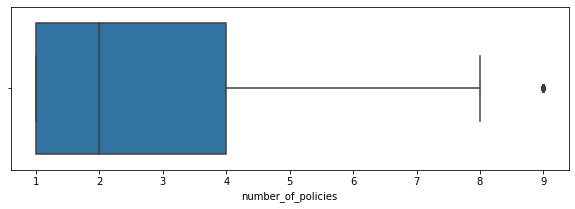

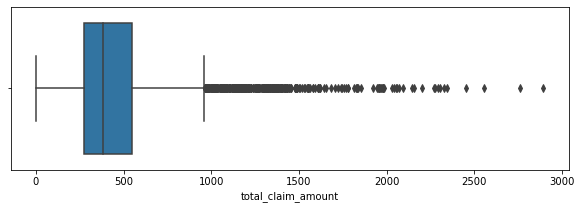

In [22]:
for num in customer_df.select_dtypes(include=np.number):
    plt.figure(figsize=(10,3))
    sns.boxplot(x=customer_df_num[num])
    plt.show()

The variables clv, monthly_premium_auto, total_claim_amount have too many outliers to remove them. Removing the data would result in losing too much data. I will keep those and instead only remove outliers for the remaining features as per below.


In [23]:
customer_df.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [24]:
outlier_cols = customer_df[['income',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies']]
q1 = 0.25
q3 = 0.75

def remove_outliers(outlier_cols,q1,q3):
    Q1 = outlier_cols.quantile(q1)
    Q3 = outlier_cols.quantile(q3)
    IQR = Q3 - Q1
    customer_df = outlier_cols[~((outlier_cols<(Q1-1.5*IQR)) | (outlier_cols>(Q3+1.5*IQR)))]
    return customer_df

print(remove_outliers(outlier_cols,q1,q3))

      income  months_since_last_claim  months_since_policy_inception  \
0      56274                       32                              5   
1          0                       13                             42   
2      48767                       18                             38   
3          0                       18                             65   
4      43836                       12                             44   
...      ...                      ...                            ...   
9129   71941                       18                             89   
9130   21604                       14                             28   
9131       0                        9                             37   
9132   21941                       34                              3   
9133       0                        3                             90   

      number_of_open_complaints  number_of_policies  
0                           0.0                 1.0  
1                          

#### Normalize the continuous variables. You can use any one method you want.


In [25]:
customer_df.select_dtypes(include=np.number).columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [26]:
from sklearn.preprocessing import MinMaxScaler
Scaler= MinMaxScaler()
scaled_df_num = Scaler.fit_transform(customer_df.select_dtypes(include=np.number))
scaled_df_num = pd.DataFrame(scaled_df_num, columns=customer_df.select_dtypes(include=np.number).columns)


In [27]:
print(scaled_df_num)

      customer_lifetime_value    income  monthly_premium_auto  \
0                    0.010629  0.562847              0.033755   
1                    0.062406  0.000000              0.139241   
2                    0.134960  0.487763              0.198312   
3                    0.070589  0.000000              0.189873   
4                    0.011245  0.438443              0.050633   
...                       ...       ...                   ...   
9129                 0.264137  0.719547              0.050633   
9130                 0.014719  0.216081              0.075949   
9131                 0.076951  0.000000              0.101266   
9132                 0.069098  0.219452              0.147679   
9133                 0.008766  0.000000              0.067511   

      months_since_last_claim  months_since_policy_inception  \
0                    0.914286                       0.050505   
1                    0.371429                       0.424242   
2                    0.5142

#### Encode the categorical variables

Hint for Categorical Variables

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
- One hot to state X
- Ordinal to coverage X
- Ordinal to employmentstatus X
- Ordinal to location code X
- One hot to marital status X
- One hot to policy type X
- One hot to policy X 
- One hot to renew offer X
- One hot to sales channel X
- One hot vehicle class X
- Ordinal vehicle size X

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
given that column "coverage" in the dataframe "data" has three categories:
"basic", "extended", and "premium" and values are to be represented in the same order.

In [28]:
from numpy import array
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore")

cat_encoder = customer_df[['state','marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class' ]]
cat_ordinal = customer_df[['coverage', 'employmentstatus', 'location_code', 'vehicle_size']]

In [29]:
#Encoding
result = ohe.fit_transform(cat_encoder).toarray()

In [30]:
#Transform to dataframe and naming columns
df_encoded = pd.DataFrame(result)
df_encoded.columns = ohe.get_feature_names_out()

In [31]:
df_encoded.info() #sanity check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state_Arizona                9134 non-null   float64
 1   state_California             9134 non-null   float64
 2   state_Nevada                 9134 non-null   float64
 3   state_Oregon                 9134 non-null   float64
 4   state_Washington             9134 non-null   float64
 5   marital_status_Divorced      9134 non-null   float64
 6   marital_status_Married       9134 non-null   float64
 7   marital_status_Single        9134 non-null   float64
 8   policy_type_Corporate Auto   9134 non-null   float64
 9   policy_type_Personal Auto    9134 non-null   float64
 10  policy_type_Special Auto     9134 non-null   float64
 11  policy_Corporate L1          9134 non-null   float64
 12  policy_Corporate L2          9134 non-null   float64
 13  policy_Corporate L

In [32]:
#Ordinal encoding 

cat_ordinal["coverage"] = customer_df["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
cat_ordinal["employmentstatus"] = customer_df["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, "Disabled" : 2, "Medical Leave" : 3, "Retired" : 4 })
cat_ordinal["location_code"] = customer_df["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
cat_ordinal["vehicle_size"] = customer_df["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large" : 2})
cat_ordinal["response"] = customer_df["response"].map({"No" : 0, "Yes" : 1})
cat_ordinal["gender"] = customer_df["gender"].map({"F" : 0, "M" : 1})

In [33]:
customer_df.head(5) #sanitycheck 

#Not sure why gender and response were not mentioned in the exercise, should be encoded using ordinal encoding as well

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### Convert effective to date  as int

In [34]:
customer_df["effective_to_date"] = pd.to_datetime(customer_df["effective_to_date"])
customer_df['year'] = customer_df['effective_to_date'].dt.year
customer_df['month'] = customer_df['effective_to_date'].dt.month

In [35]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premium_a

#### And now we can bring everything together and merge the numerical + categorical data

In [36]:
customer_df_cat = pd.concat([df_encoded,cat_ordinal], axis=1)

In [37]:
customer_df_cat

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,...,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage,employmentstatus,location_code,vehicle_size,response,gender
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,0,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1,1,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,2,0,0,0,0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0,1,0,0,0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0,0,2,0,0,1
9130,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,1,0
9131,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1,1,0,0,0,1
9132,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1,0,0,2,0,1


#### Merge with num df

In [38]:
customer_df_new = pd.concat([scaled_df_num,customer_df_cat], axis=1)

In [39]:
customer_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   float64
 2   monthly_premium_auto           9134 non-null   float64
 3   months_since_last_claim        9134 non-null   float64
 4   months_since_policy_inception  9134 non-null   float64
 5   number_of_open_complaints      9134 non-null   float64
 6   number_of_policies             9134 non-null   float64
 7   total_claim_amount             9134 non-null   float64
 8   state_Arizona                  9134 non-null   float64
 9   state_California               9134 non-null   float64
 10  state_Nevada                   9134 non-null   float64
 11  state_Oregon                   9134 non-null   float64
 12  state_Washington               9134 non-null   f

#### Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.


In [40]:
customer_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   float64
 2   monthly_premium_auto           9134 non-null   float64
 3   months_since_last_claim        9134 non-null   float64
 4   months_since_policy_inception  9134 non-null   float64
 5   number_of_open_complaints      9134 non-null   float64
 6   number_of_policies             9134 non-null   float64
 7   total_claim_amount             9134 non-null   float64
 8   state_Arizona                  9134 non-null   float64
 9   state_California               9134 non-null   float64
 10  state_Nevada                   9134 non-null   float64
 11  state_Oregon                   9134 non-null   float64
 12  state_Washington               9134 non-null   f

#### From looking at the old dataset we see that gender and response are still not encoded. Will do some more encoding and at them at line 48. Now we are good to go!

In [41]:
customer_df_new.head(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_Arizona,state_California,...,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage,employmentstatus,location_code,vehicle_size,response,gender
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,0,0,0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051,1.0,0.0,...,0.0,0.0,0.0,0.0,1,1,0,0,0,0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764,0.0,0.0,...,0.0,0.0,0.0,1.0,2,0,0,0,0,0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117,0.0,1.0,...,0.0,1.0,0.0,0.0,0,1,0,0,0,1
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1
